# Iris data python Knn classifier 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

In [3]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
print(iris.DESCR) # descriptinon of dataset

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
#printing the dataset to see 
print("Feature names:")
print(iris.feature_names)
print("Data(X):")
print(iris.data[:3])
print("Target names:[0   1   2]")
print(iris.target_names)
print("Target(y):")
print(iris.target)

Feature names:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Data(X):
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
Target names:[0   1   2]
['setosa' 'versicolor' 'virginica']
Target(y):
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [47]:
# checking shape features and target type
print(type(iris.data))
print(type(iris.target))
print(iris.data.shape)
print(iris.target.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(150, 4)
(150,)


In [7]:
# store feature matrix in "X" - captialized as it represents matrix
X = iris.data

# store response vector in "y" - capitalized as it represents a vector
y = iris.target

In [8]:
import pandas as pd # data imported and viewed  and imported as panda data froam 
data = pd.DataFrame(X, columns=iris.feature_names)
data['target'] = pd.DataFrame(y.reshape(-1,1), columns=["target"])
data.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [49]:
#Checking if there is any existing null value or not
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

# EDA

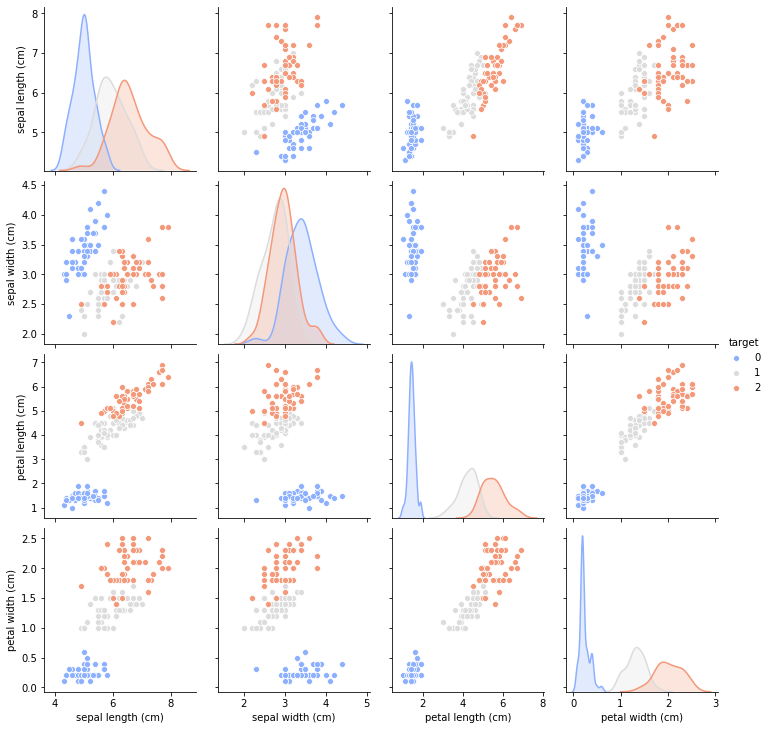

In [9]:
# THIS IS GOING TO BE A VERY LARGE PLOT
sns.pairplot(data,hue='target',palette='coolwarm')

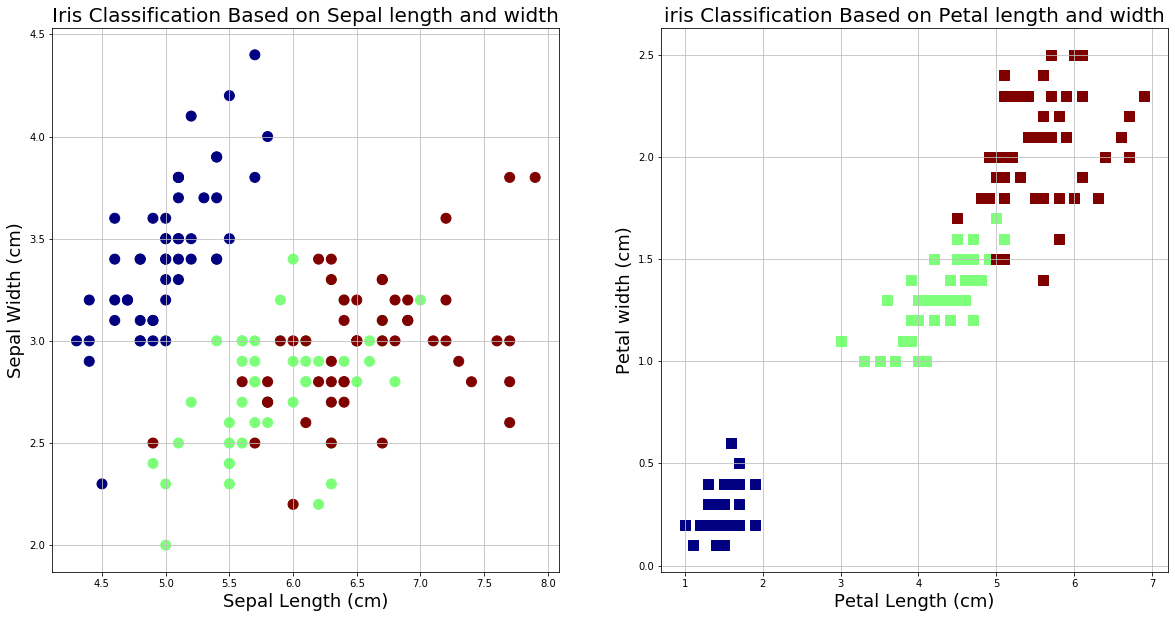

In [10]:
from matplotlib import cm

# Petal Length and Width
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121)
ax.set_title('Iris Classification Based on Sepal length and width', fontsize=20)
ax.set_xlabel('Sepal Length (cm)', fontsize=18)
ax.set_ylabel('Sepal Width (cm)',fontsize=18)
# setting grid lines 
ax.grid(True,linestyle='-',color='0.75')
ax.scatter(data['sepal length (cm)'], data['sepal width (cm)'], s = 100, 
           c=data['target'], marker='o', cmap=cm.jet)

# Sepal Length and Width
ax = fig.add_subplot(122)
ax.set_title("iris Classification Based on Petal length and width", fontsize=20)
ax.set_xlabel('Petal Length (cm)', fontsize=18)
ax.set_ylabel('Petal width (cm)', fontsize=18)
ax.grid(True, linestyle='-', color='0.75')
ax.scatter(data['petal length (cm)'], data['petal width (cm)'], s = 100, 
           c=data['target'], marker='s', cmap=cm.jet)

In [11]:
data.info() # few more information 4 target variable is integer type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [12]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


dataset = datasets.load_iris() # loaded the data set and separate our target and feature <br>
X, y = dataset.data, dataset.target

# Scaling and Standardization 

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
scaler.fit(data.drop('target',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [16]:
scaled_features = scaler.transform(data.drop('target',axis=1))

In [17]:
df_feat = pd.DataFrame(scaled_features,columns=data.columns[:-1])
df_feat.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


# Train Test Split

In [18]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [19]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,data['target'],
                                                    test_size=0.30)

# Using KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn = KNeighborsClassifier(n_neighbors=1)

In [22]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

# Predictions and Evaluations

In [23]:
pred = knn.predict(X_test)

In [24]:
from sklearn.metrics import classification_report,confusion_matrix

In [25]:
print(confusion_matrix(y_test,pred))

[[17  0  0]
 [ 0 16  1]
 [ 0  1 10]]


In [26]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.94      0.94      0.94        17
           2       0.91      0.91      0.91        11

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



# Choosing a K Value

In [27]:
# instantiate
knn = KNeighborsClassifier(n_neighbors = 30)

# train
knn.fit(X_train, y_train)

# predict
y_pred = knn.predict(X_test)

# test accuracy
print(metrics.accuracy_score(y_test, y_pred))

0.8888888888888888


In [28]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

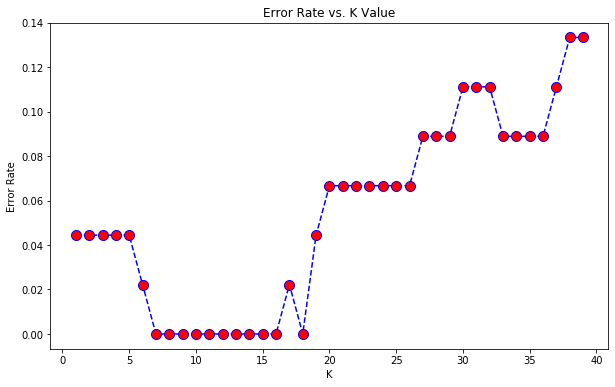

In [29]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [30]:
# NOW WITH K=30
knn = KNeighborsClassifier(n_neighbors=30)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=30')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=30


[[17  0  0]
 [ 0 14  3]
 [ 0  2  9]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.88      0.82      0.85        17
           2       0.75      0.82      0.78        11

    accuracy                           0.89        45
   macro avg       0.88      0.88      0.88        45
weighted avg       0.89      0.89      0.89        45

